In [59]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD, Adam
import pandas as pd
from sklearn.model_selection import train_test_split

### Geração da serie e preparação dos dados

In [60]:
def gerar_serie(n):
    n = np.arange(n)
    # y(n)=2*sin(0.5*n)+cos(1.5*n +(π/4)),
    y = 2 * np.sin(0.5*n) + np.cos(1.5*n + (np.pi/4))
    return y


def preparar_dados(y, K):
    X, y_output = [], []
    for i in range(len(y) -K -3 + 1):
        X.append(y[i:i+K])
        y_output.append(y[i+K:i+K+3])
    
    return np.array(X), np.array(y_output)
        

### Geração da serie

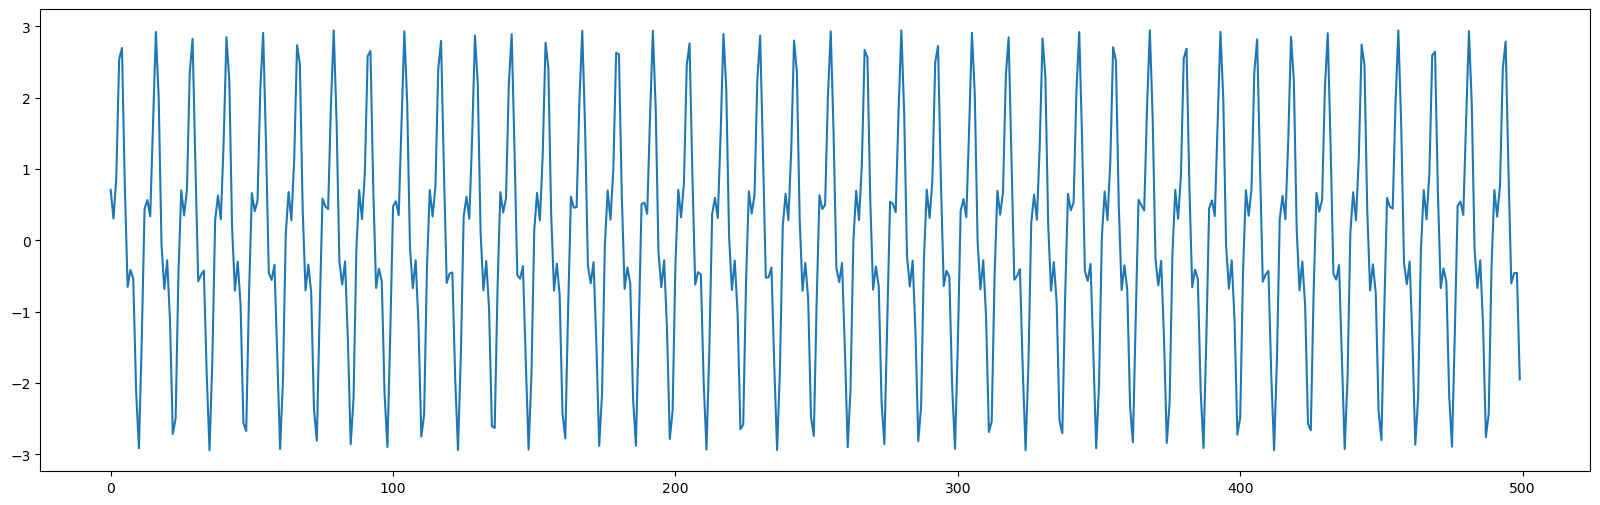

In [61]:
serie = gerar_serie(500)

# plota a série
plt.figure(figsize=(20,6))
plt.plot(serie)
plt.show()

### Preparação dos dados

In [62]:
X, y_output = preparar_dados(serie, 10)

#plotar os dados em formato de tabela
df = pd.DataFrame(X)
df['y_output'] = y_output.tolist()
df.head()

,0,1,2,3,4,5,6,7,8,9,y_output
0,0.707107,0.303534,0.883125,2.537153,2.695114,0.778786,-0.653438,-0.415783,-0.537496,-2.102749,"[-2.9148519655924554, -1.4044421312480337, 0.4..."
1,0.303534,0.883125,2.537153,2.695114,0.778786,-0.653438,-0.415783,-0.537496,-2.102749,-2.914852,"[-1.4044421312480337, 0.43911160050918385, 0.5..."
2,0.883125,2.537153,2.695114,0.778786,-0.653438,-0.415783,-0.537496,-2.102749,-2.914852,-1.404442,"[0.43911160050918385, 0.5647847897432892, 0.33..."
3,2.537153,2.695114,0.778786,-0.653438,-0.415783,-0.537496,-2.102749,-2.914852,-1.404442,0.439112,"[0.5647847897432892, 0.3350652477519005, 1.602..."
4,2.695114,0.778786,-0.653438,-0.415783,-0.537496,-2.102749,-2.914852,-1.404442,0.439112,0.564785,"[0.3350652477519005, 1.602964721879753, 2.9189..."


### Divisão dos dados e calculo da quantidade de neuronios

In [63]:
# separar os dados em treino e teste. as 400 primeiras amostras serão usadas para treino e as 100 restantes para teste
x_train, x_test, y_train, y_test = X[:400], X[400:], y_output[:400], y_output[400:]

# separar os dados de treino em treino e validação, as 300 primeiras amostras serão usadas para treino e as 100 restantes para validação
x_train, x_val, y_train, y_val = x_train[:300], x_train[300:], y_train[:300], y_train[300:]

num_neuronios = int((x_train.shape[0] - 10)/(10*(x_train.shape[1] + 2)))
print(x_train.shape[0], x_train.shape[1], num_neuronios)

300 10 2


### Treinamento da rede neural

Epoch 1/100


c:\Users\ivoar\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.1586 - val_loss: 1.1601
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3700 - val_loss: 0.7375
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6962 - val_loss: 0.6433
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5323 - val_loss: 0.4392
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3999 - val_loss: 0.2866
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2594 - val_loss: 0.1800
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1596 - val_loss: 0.1104
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0939 - val_loss: 0.0925
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0882 - val_loss: 0.0864
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0881 - val_loss: 0.0850
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0823 - val_loss: 0.0865
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0807 - val_

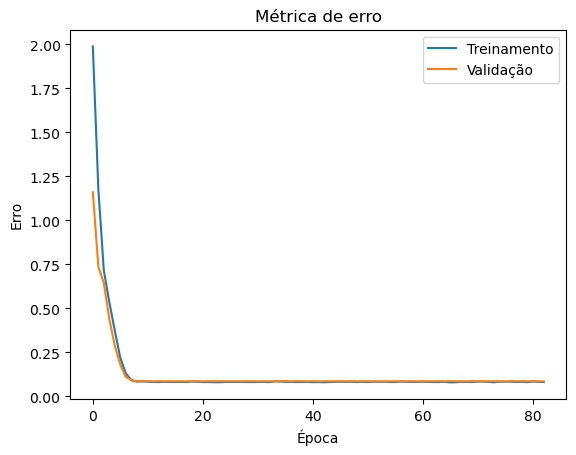

In [64]:
# ['sigmoid', 'relu', 'selu', 'tanh', 'linear']
model = Sequential()
model.add(Dense(num_neuronios, input_dim=10, activation='linear', kernel_initializer='normal'))
model.add(Dense(3, activation='linear'))

# SGD com momentum
sgd = SGD(learning_rate=0.01, momentum=0.9)

# Compilar o modelo com a função de perda correta para regressão
model.compile(loss='mean_squared_error', optimizer=sgd)

# Parar o treinamento se a rede não melhorar após 30 épocas
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)

# Treinar o modelo
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=32, verbose=1, callbacks=[es])

# Avaliar o modelo no conjunto de validação
val_loss = model.evaluate(x_val, y_val, batch_size=32, verbose=0)
print(f'--> Erro quadrático médio (validação): {val_loss:.4f}')

# Exibir o histórico de treinamento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Métrica de erro')
plt.ylabel('Erro')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Validação'])
plt.show()

### Predição teste

In [65]:
# avaliar o modelo no conjunto de teste
test_loss = model.evaluate(x_test, y_test, batch_size=32, verbose=0)
print(f'--> Erro quadrático médio (teste): {test_loss:.4f}')

# Fazer previsões
y_pred = model.predict(x_test)


--> Erro quadrático médio (teste): 0.0817
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


### Previsao do primeiro y

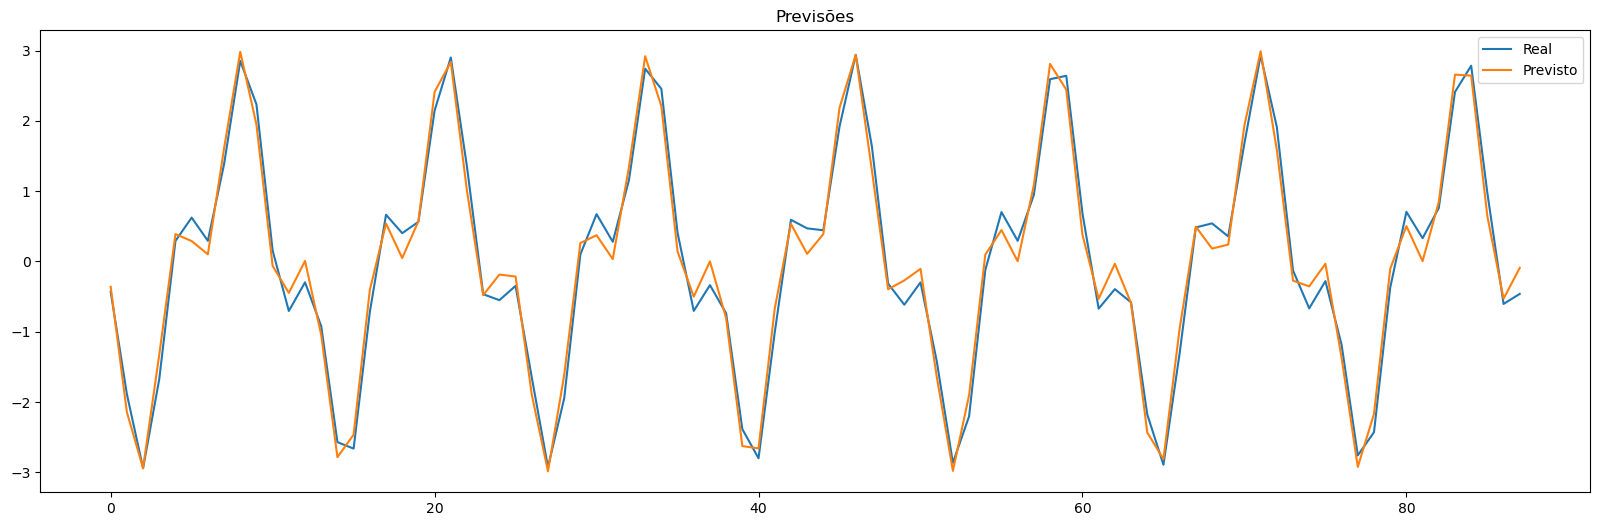

In [66]:
# Exibir previsões
plt.figure(figsize=(20, 6))
plt.plot(y_test[:, 0], label='Real')
plt.plot(y_pred[:, 0], label='Previsto')
plt.title('Previsões')
plt.legend()
plt.show()

### Previsao do segundo y

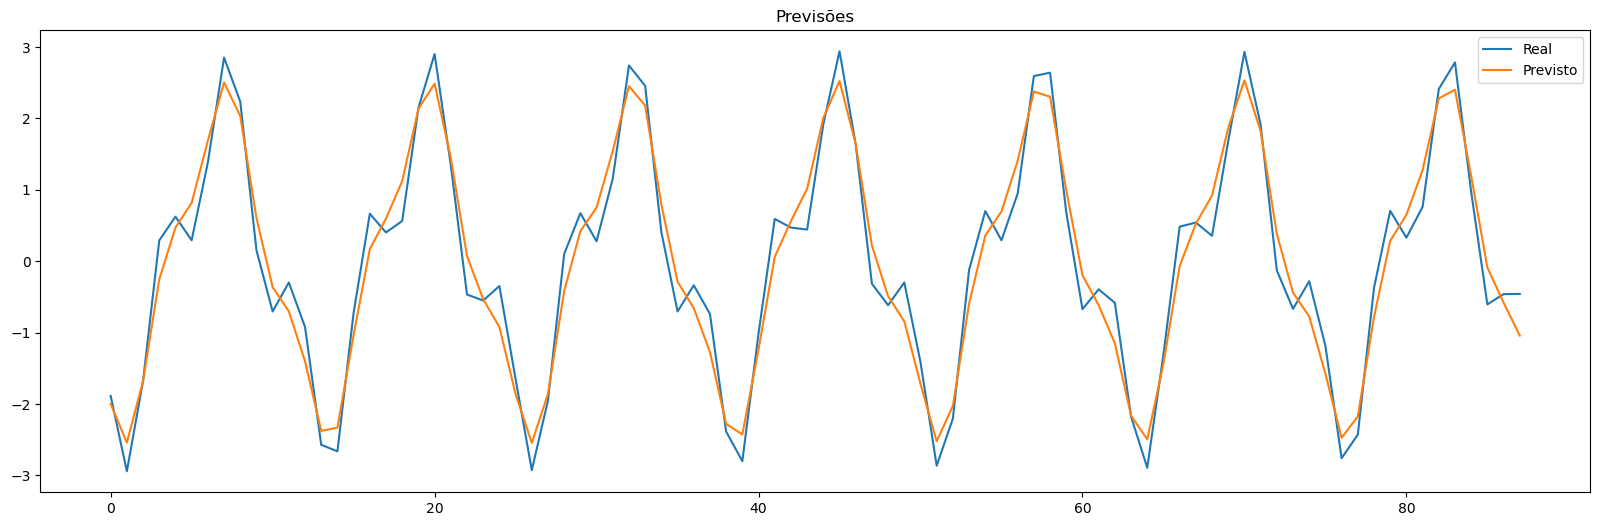

In [67]:
# Exibir previsões
plt.figure(figsize=(20, 6))
plt.plot(y_test[:, 1], label='Real')
plt.plot(y_pred[:, 1], label='Previsto')
plt.title('Previsões')
plt.legend()
plt.show()

### Previsao do terceiro y

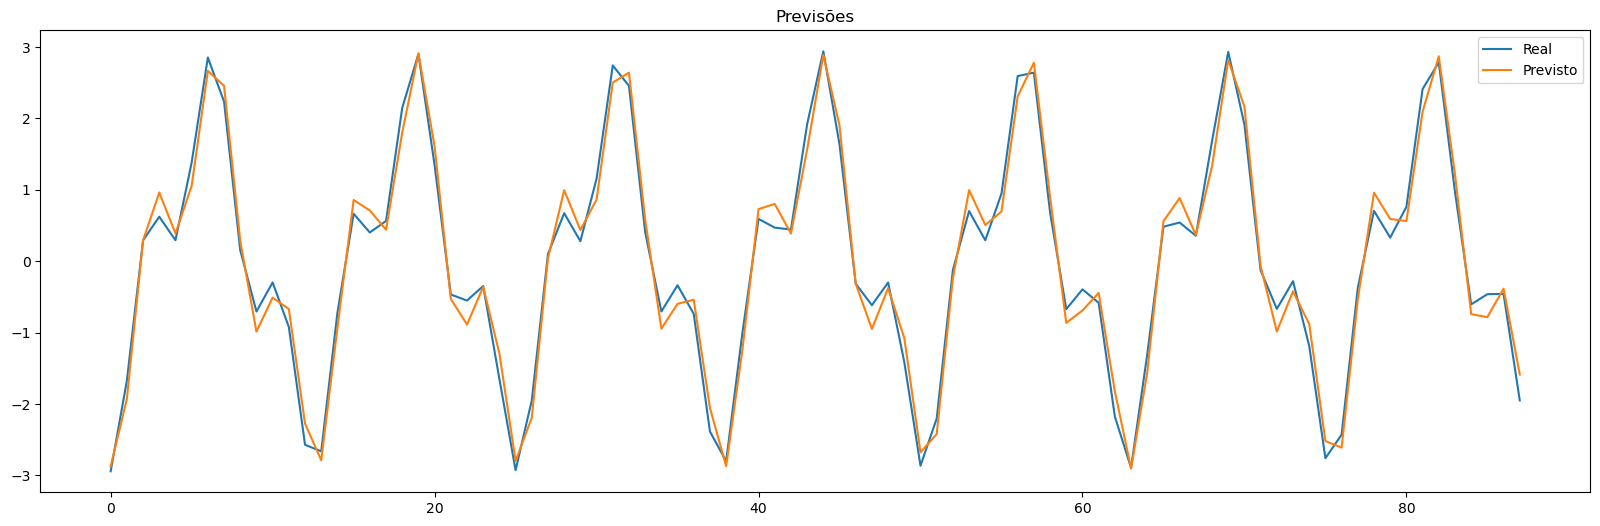

In [68]:
# Exibir previsões
plt.figure(figsize=(20, 6))
plt.plot(y_test[:, 2], label='Real')
plt.plot(y_pred[:, 2], label='Previsto')
plt.title('Previsões')
plt.legend()
plt.show()